# Daily Streamflow data Plotting and Analysis...
## ... from multiple Excel files (daily data and optionnal current meter measurements)
L. Duffar, October 2020 https://github.com/loicduffar

DATA REQUIREMENT:
- Data are read from up to 3 excel files (or 3 tabs in 1 or 2 excel files)
- One column must be an excel date in each excel tab
- Unlimited excel columns number
- Excel column header name is required (only for columns that are read)

PLEASE PROCESS CELLS BELOW STARTING BY THE FIRST ONE:
- <a href=#section01>1)</a> Excel files reading and data display
- <a href=#section02>2)</a> Raw data plotting
- <a href=#section03>3)</a> Monthly aggregation and display
- <a href=#section04>4)</a> Daily frequency analysis

Output files are stored in a user defined directory.

## <a name=section01></a>1. EXCEL FILES READING AND DATA DISPLAY
- Set the path and name for each Excel file (empty string for CURRENT working directory)
- Set the path for output files
- Set the sheet name (tab) for each file
- Set the initial lines number to be skipped for each excel tab
- Set the DATE column name for each excel tab
- Set the column number to be read (or let ALL columns to be read if they all got an header)
- Set the column names to use (headers)

An output file is stored in the user defined directory.

In [50]:
"""
Created on Oct 2020
@author: Loïc Duffar
"""
# ===================================================
# ========== EXCEL FILES READING AND DATA DISPLAY ===
# ===================================================
import pandas as pd
import hvplot.pandas
import os.path

# *************** Customization
# File paths WITHOUT ending backslash (\) !
path1= r'C:\Users\DUFFAR\Documents\A\ETUDES\2018 PCH Rabioux\2020'
path2= r'C:\Users\DUFFAR\Documents\A\ETUDES\2018 PCH Rabioux\Débits\SCP'
path3 = r'C:\Users\DUFFAR\Documents\A\ETUDES\2018 PCH Rabioux\Modelisation\01_src'
output_file_path = '../out' # empty string for CURRENT working directory

# Excel File names (empty string if no file2 or file3)
file1=  'Torrent du Rabioux - Simulation débit et productible.xlsx'
file2 = 'QMJ Chateauroux Rabioux MAJ au 08 octobre 2020.xlsx'
file3 = 'Rabioux-Obs.xlsx'

# Sheet names
sheet_name1 = "Simulation depuis 1999"
sheet_name2 = "Données"
sheet_name3 = "Obs depuis Sept 1998"

# Number of rows to skip at the top of the file
skiprows1 = 4
skiprows2 = 1
skiprows3 = 0

# Excel date column (name)
date1 = 'Date'
date2 = 'Date'
date3 = 'Date'

# Column numbers to read : list of column numbers (index starting from 0), or anything except a list for ALL columns
cols1 = [0, 3, 8, 3]
cols2 = [0, 1, 2, 4, 5, 8]
cols3 = [0, 1, 2, 4]

# Column names to use : List of names (column headers in excel file), or anything except a list for ALL columns (e.g. 'all')
data1 = 'ALL'
data2 = ['QMJ Rabioux au Pont de la Serre (m3/s)', "QMJ Canal d'irrigation de Grammorel (m3/s)", 
                  'Jaugeage au Pont de la Serre (m3/s)', 'Jaugeage canal Grammorel (m3/s)']
data3 = 'ALL'

# *************** Data read
cols1 = None if not isinstance(cols1, list) else cols1
cols2 = None if not isinstance(cols2, list) else cols2
cols3 = None if not isinstance(cols3, list) else cols3

file1 = file1 if len(path1)==0 else path1 + '/' + file1
file2 = file2 if len(file2)==0 or len(path2)==0 else path2 + '/' + file2
file3 = file3 if len(file3)==0 or len(path3)==0 else path3 + '/' + file3
df = pd.read_excel(file1, sheet_name=sheet_name1, skiprows=range(0, skiprows1), index_col= date1, usecols=cols1)
if  len(file2)!=0:df2= pd.read_excel(file2, sheet_name=sheet_name2, skiprows=range(0, skiprows2), index_col= date2, usecols=cols2)
if  len(file3)!=0:df3= pd.read_excel(file3, sheet_name=sheet_name3, skiprows=range(0, skiprows3), index_col= date3, usecols=cols3)

# *************** Dataframe creation and display
file_prefix = 'daily streamflows'
df1_subset = df if not isinstance(data1, list) else df[data1]
if  len(file2)!=0: df2_subset = df2 if not isinstance(data2, list) else df2[data2]
if  len(file3)!=0: df3_subset = df3 if not isinstance(data3, list) else df3[data3]

if len(file2)!=0: df = df1_subset.join(df2_subset, on=date1)
if len(file3)!=0:df = df.join(df3_subset, on=date1)

output_file = file_prefix + '-raw data.xlsx'
df.to_excel(os.path.join(output_file_path, output_file), sheet_name= 'raw data')

df.hvplot.table()

:Table   [Date,Juin 2020,Obs. Mai 2020 m3/s,QMJ Rabioux au Pont de la Serre (m3/s),QMJ Canal d'irrigation de Grammorel (m3/s),Jaugeage au Pont de la Serre (m3/s),Jaugeage canal Grammorel (m3/s),P,E,T]

## <a name=section02></a>2. RAW DATA PLOTTING
- Set a list of column names for lines plotting (hydrographs)
- Set a list of column names for points plotting (current meter gauges)
- Set the y axe label
- Set color list for lines (anything else except a list for DEFAULT colors for all lines; e.g. None, 'DEFAULT', ...)
 Any <a href="https://www.w3schools.com/cssref/css_colors.asp">CSS color names</a>,  for example an approximate equivalent to the 10 default colors: 
 ['cornflowerblue', 'darkorange', 'forestgreen', 'crimson', 'mediumpurple', 'sienna', 'orchid', 'gray', 'goldenrod', 'darkturqoise'] or else 'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'yellow', 'cyan', 'magenta' etc...

- Set width list for lines (anything else except a list for DEFAULT values 2 for all lines; e.g. None or 'DEFAULT').
- Set type list for lines ('solid', 'dashed', 'dotted', 'dotdash', 'dashdot').  Anything else except a list for DEFAULT value ('solid') for all lines
- Set color list for points

The output graphe file is stored in the defined path

In [16]:
# ========================================
# ==========RAW DATA PLOTTING ============
# ========================================

# *************** Plot Customization
hydr = [ 'Juin 2020', 'Obs. Mai 2020 m3/s',  'QMJ Rabioux au Pont de la Serre (m3/s)', "QMJ Canal d'irrigation de Grammorel (m3/s)"]
gauging = ['Jaugeage au Pont de la Serre (m3/s)', 'Jaugeage canal Grammorel (m3/s)']
y_label = 'm3/s' 
line_color = ['pink', 'skyblue', 'grey', 'lightgreen', 'yellow']# https://www.w3schools.com/cssref/css_colors.asp
line_width = [1,2,2,2]
line_dash = ['solid','solid','dashed']
point_color = ['gray', 'forestgreen']

# *************** Plotting
default_color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']# tab10 (matplotlib)
# approximate equivalents ['cornflowerblue', 'darkorange', 'forestgreen', 'crimson', 'mediumpurple', 'sienna', 'orchid', 'gray', 'goldenrod', 'darkturqoise']
default_width = [2 for i in range(0,10)]
default_dash = ['solid' for i in range(0,10)]
line_color=default_color if not isinstance(line_color, list) else line_color
line_width=default_width if not isinstance(line_width, list) else line_width
line_dash=default_dash if not isinstance(line_dash, list) else line_dash
point_color=default_color if not isinstance(point_color, list) else point_color

plot_hydr= df[hydr].hvplot(width=900, height=500, legend='top_left', color=line_color, line_width=line_width, \
                           line_dash=line_dash, value_label=y_label)
plot_gaug= df[gauging].hvplot.scatter(width=900, height=500, legend='top_left', color=point_color)
plot = plot_hydr * plot_gaug
html_file = os.path.join(output_file_path, file_prefix + '-raw data.html')
hvplot.save(plot, html_file)
plot

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (m3/s)
   .NdOverlay.II :NdOverlay   [Variable]
      :Scatter   [Date]   (value)

## <a name=section03></a>3. MONTHLY AGGREGATION BY MEAN OR SUM
The minimum number of values is 28 for monthly aggregation, otherwise the monthly value is set to NaN (not a number)

- Set a list of columns for monthly aggregation BY MEAN 
- Set a list of columns for monthly aggregation BY SUM (if any data like precipition or evaporation)

The output excel file is stored in the user defined path

In [12]:
# ==========================================================
# ============== MONTHLY AGGREGATION BY MEAN OR SUM ========
# ==========================================================

# *************** Customization: Column lists for mean aggregation (or sum aggregation in case of precipitations)
by_mean = hydr + ['T']
by_sum = ['P', 'E'] # empty list for none

# *************** Aggregate by Month and display tables
resample = df.resample(rule='M')
df_month = resample.sum(min_count=28)

output_file = file_prefix + '-monthly aggregation.xlsx'# empty string for none
output_file = os.path.join(output_file_path, output_file)
with pd.ExcelWriter(output_file) as writer:
    for cols in [by_sum, by_mean]:
        print(cols)
        if cols==by_mean: df_month = df_month / resample.count()
        for var in cols:
            QM = pd.DataFrame(df_month[var])
            QM['MONTH'] = QM.index.month
            QM['YEAR'] = QM.index.year
            table = pd.pivot_table(QM, index='YEAR', columns='MONTH')
            display(table)
            if len(output_file)!=0: table.to_excel(writer, sheet_name= var[:10])

['P', 'E']


P                                                                 \
MONTH     1      2      3      4      5      6      7      8      9      10   
YEAR                                                                          
1999     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  201.2  316.4   
2000     5.9  101.6  108.9  271.4   86.5   33.7  122.3  129.8  155.7  343.3   
2001   209.9   28.7  419.1  110.3  152.0   82.2   67.4   51.4  233.2  141.6   
2002    51.8  123.0  113.0   43.5  222.4  102.0   94.8  141.1  185.3  132.1   
2003   106.8   59.1   31.4  131.6   54.8   72.4   32.4  105.7   99.8  405.9   
2004   218.5   89.6   40.0   83.6   62.6   38.2   40.3  125.8   33.0  347.1   
2005    26.4    5.3   88.4  146.1   78.7  110.1   57.5   53.2  108.7  169.6   
2006    46.7   97.4  188.9   73.8  131.9   35.0  123.1  108.7  207.3  192.9   
2007    65.7  112.4  101.8   31.3  169.1  105.3   46.4   76.4   51.0    4.9   
2008   190.9   49.3  116.8  234.6  279.1  144.0  122.3  125.5  179.1  134.8   
2009   124.4  105.9   63.7   81.6   79.6  137.4   17.8   83.8   80.3   84.1   
2010   108.8  188.8  102.6   86.7  196.0  179.1   27.6   68.5  159.1  177.0   
2011    75.7   22.7   79.2   35.5   95.7  121.5  196.1  116.1   99.3  126.4   
2012    89.7    0.0   28.1  271.4  156.0  103.8   29.7   50.7  111.9   83.0   
2013   111.4   75.7  216.1  187.6  278.0   74.0  170.7   77.0   94.3  210.6   
2014   265.9  199.0   45.8   36.1  102.7  104.3  132.3  154.3   68.3  113.9   
2015   121.6   76.0   51.1   78.1  103.3  156.1   70.0  155.7  168.9  199.3   
2016   164.5  130.2   59.2   90.1  190.4  140.6   96.9   41.4   78.9  206.2   
2017    20.9  118.6  105.6   94.5  167.3  120.1   52.5   75.0   37.2    2.8   
2018   188.7   73.8  276.0   99.6  172.5   80.1   67.6  185.0   22.7  193.3   
2019    70.9   69.6   47.5  189.7  101.6  135.6   83.3   31.0   52.3  353.5   
2020    58.7   96.9  133.0   70.2  170.8    NaN    NaN    NaN    NaN    NaN   

                     
MONTH     11     12  
YEAR                 
1999    99.0  156.5  
2000   482.1  147.1  
2001    13.3   26.2  
2002   501.9   95.6  
2003   147.3   78.2  
2004    68.9  141.8  
2005    83.1  127.5  
2006    80.7  162.8  
2007   204.6  122.4  
2008   138.2  117.6  
2009   153.9  301.6  
2010   171.7  192.1  
2011   230.1  195.6  
2012   372.9  225.1  
2013   180.9  203.8  
2014   397.5   42.5  
2015    68.6    3.8  
2016   341.9    1.0  
2017    55.4  381.6  
2018   173.0  146.0  
2019   268.6  296.7  
2020     NaN    NaN

E                                                                  \
MONTH    1     2     3     4      5      6      7      8     9     10    11   
YEAR                                                                          
1999    NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN  78.4  48.3  25.2   
2000   25.5  33.4  50.4  57.2   99.1  126.2  127.4  117.6  89.2  44.1  21.3   
2001   19.5  33.7  44.5  58.4   89.4  123.1  131.3  129.0  71.7  64.4  29.2   
2002   30.8  30.3  53.2  67.5   84.7  131.3  127.1  101.7  64.7  53.3  24.1   
2003   20.5  24.1  53.9  65.1  101.9  149.6  158.5  138.3  84.9  47.4  30.4   
2004   21.6  34.0  44.7  56.2   84.7  122.3  141.1  121.5  94.8  47.0  33.4   
2005   30.9  22.6  50.7  60.5   98.0  129.8  130.7  105.1  70.9  48.2  26.8   
2006   25.1  24.9  33.2  60.3   86.0  117.5  143.5   96.8  77.2  63.2  41.7   
2007   35.1  32.3  44.8  78.7   85.9   97.5  133.3  101.4  76.7  54.5  38.8   
2008   36.6  40.9  42.0  55.2   74.9  110.0  122.4  110.3  64.5  41.1  26.6   
2009   27.4  24.5  49.6  54.8  105.1  108.8  140.8  129.6  73.4  58.9  29.3   
2010   22.1  20.5  39.4  63.3   70.2  106.7  142.3  108.1  75.3  52.0  23.7   
2011   28.3  38.7  47.4  81.4   98.9   97.8  104.0  126.1  91.4  61.4  40.0   
2012   30.5  37.4  68.4  47.6   86.4  123.6  122.7  138.2  72.4  48.9  30.0   
2013   33.6  21.5  35.2  52.9   69.2  102.2  123.0  117.1  75.0  43.7  27.2   
2014   20.1  21.5  59.0  61.0   82.3  114.5   98.7   93.0  74.9  53.5  28.1   
2015   30.4  28.2  46.6  68.8   94.6  119.6  172.4  106.4  61.8  47.9  52.4   
2016   21.2  26.4  42.1  53.5   80.7  100.1  130.7  121.9  81.1  50.0  27.6   
2017   28.4  29.0  49.9  68.0   92.8  123.1  122.0  123.0  62.9  71.4  33.7   
2018   24.8  20.5  32.1  71.6   75.8  100.0  132.3  116.4  96.5  61.4  30.2   
2019   31.1  47.4  61.8  62.3   81.9  142.8  150.1  131.6  95.2  59.7  22.8   
2020   36.2  41.2  49.4  85.4  102.1    NaN    NaN    NaN   NaN   NaN   NaN   

             
MONTH    12  
YEAR         
1999   21.7  
2000   22.3  
2001   26.9  
2002   19.4  
2003   26.0  
2004   28.7  
2005   24.4  
2006   29.0  
2007   32.3  
2008   28.9  
2009   21.4  
2010   21.1  
2011   23.8  
2012   21.9  
2013   37.4  
2014   30.1  
2015   33.4  
2016   43.2  
2017   23.0  
2018   32.1  
2019   32.5  
2020    NaN

['Juin 2020', 'Obs. Mai 2020 m3/s', 'QMJ Rabioux au Pont de la Serre (m3/s)', "QMJ Canal d'irrigation de Grammorel (m3/s)", 'T']


Juin 2020                                                              \
MONTH        1         2         3         4         5         6         7    
YEAR                                                                          
1999        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000   0.177272  0.198781  0.227289  0.832881  2.397304  1.030350  0.440449   
2001   0.521610  0.225510  1.314628  0.607951  3.073975  2.602125  1.089272   
2002   0.194653  0.218015  0.264373  0.248831  1.189843  1.425217  0.256484   
2003   0.258257  0.184036  0.209222  0.570154  2.059209  1.193081  0.242539   
2004   0.297437  0.408669  0.344141  0.305126  1.002642  1.184793  0.335678   
2005   0.178220  0.191183  0.387411  0.407755  0.943373  0.725542  0.314975   
2006   0.190527  0.209476  0.290437  0.646773  1.859796  0.603890  0.400369   
2007   0.244329  0.202314  0.255146  0.426395  0.956093  1.129205  0.279959   
2008   0.339184  0.322099  0.246761  0.513356  3.522132  2.660444  0.827977   
2009   0.202583  0.215716  0.260884  0.514655  1.845556  1.658517  0.251408   
2010   0.339113  0.195893  0.257540  0.736647  1.964467  3.556710  0.852342   
2011   0.344235  0.268513  0.213216  0.687867  0.736376  1.082580  0.904987   
2012   0.170613  0.190011  0.276502  0.462518  1.759303  1.482245  0.293552   
2013   0.386861  0.227626  0.208290  1.636415  2.613310  2.333394  1.432964   
2014   0.301286  0.224620  0.688160  0.918319  1.132543  1.554992  0.944034   
2015   0.203448  0.186344  0.213854  0.561280  1.482588  1.280321  0.286348   
2016   0.197953  0.261975  0.232353  0.572049  1.255272  1.566404  0.381758   
2017   0.181866  0.183734  0.288834  0.344115  1.344852  0.842027  0.300415   
2018   0.403380  0.283010  0.360412  1.867230  3.216347  2.218976  0.324798   
2019   0.268169  0.323190  0.393770  0.450375  0.792253  1.754520  0.517087   
2020   0.427049  0.386700  0.546007  0.762862  2.184103       NaN       NaN   

                                                         
MONTH        8         9         10        11        12  
YEAR                                                     
1999        NaN  0.777897  2.046356  0.758307  0.196712  
2000   0.395386  0.786211  1.762245  1.412109  0.817671  
2001   0.275006  0.968730  1.226901  0.299427  0.177502  
2002   0.366326  1.250358  0.486355  1.639404  0.538130  
2003   0.205673  0.261449  0.975520  1.021645  0.426290  
2004   0.286297  0.215332  1.399701  0.974305  0.204297  
2005   0.193886  0.470564  0.814777  0.625376  0.203802  
2006   0.402993  0.813351  1.555170  0.472807  0.501941  
2007   0.193706  0.216836  0.216601  0.601878  0.340124  
2008   0.621497  1.081799  0.256828  0.522245  0.225907  
2009   0.189593  0.225026  0.306491  0.398142  0.510197  
2010   0.246174  0.762642  0.420155  0.600450  0.374612  
2011   0.556206  0.383114  0.353802  2.273366  0.227896  
2012   0.182049  0.326979  0.444777  2.172717  0.461087  
2013   0.673261  0.286182  1.175974  0.889066  0.233469  
2014   0.585709  0.298315  0.691188  1.603845  0.499123  
2015   0.507238  1.101666  0.952802  0.506392  0.218261  
2016   0.216225  0.247375  1.017800  1.708483  0.463252  
2017   0.208181  0.233950  0.215042  0.233253  0.284677  
2018   0.616799  0.221662  0.261880  0.513930  0.439239  
2019   0.211659  0.216095  2.409061  1.199430  0.454263  
2020        NaN       NaN       NaN       NaN       NaN

Obs. Mai 2020 m3/s                                                   \
MONTH                 1         2         3         4        5         6    
YEAR                                                                        
2018                 NaN       NaN       NaN       NaN      NaN  3.312933   
2019            0.230677  0.330429  0.476871  1.314800  2.07171  2.881867   
2020            0.418871  0.507414  0.911548  2.304833      NaN       NaN   

                                                                 
MONTH        7         8         9         10      11        12  
YEAR                                                             
2018   0.856161  0.526097  0.208833  0.251419  0.6569  0.453258  
2019   0.909161  0.285968  0.193900       NaN     NaN  0.744226  
2020        NaN       NaN       NaN       NaN     NaN       NaN

QMJ Rabioux au Pont de la Serre (m3/s)                                \
MONTH                                     1         2         3         4    
YEAR                                                                         
2018                                     NaN       NaN       NaN       NaN   
2019                                0.230677  0.330429  0.476871  1.314800   
2020                                0.425806  0.523103  0.953774  2.314133   

                                                                           \
MONTH        5         6         7         8         9         10      11   
YEAR                                                                        
2018        NaN  3.313333  0.852581  0.441129  0.119733  0.186581  0.6569   
2019   2.081903  2.829400  0.816548  0.197645  0.143667       NaN     NaN   
2020   4.142258       NaN       NaN       NaN       NaN       NaN     NaN   

                 
MONTH        12  
YEAR             
2018   0.453258  
2019   0.779935  
2020        NaN

QMJ Canal d'irrigation de Grammorel (m3/s)                      \
MONTH                                          5         6         7   
YEAR                                                                   
2018                                         NaN       NaN       NaN   
2019                                         NaN  0.169567  0.122226   
2020                                    0.093581       NaN       NaN   

                         
MONTH         8       9  
YEAR                     
2018   0.084968  0.0891  
2019   0.089516  0.0524  
2020        NaN     NaN

T                                                                \
MONTH        1         2         3         4         5          6          7    
YEAR                                                                            
1999        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
2000  -5.441935 -3.489655 -2.761290 -0.850000  4.612903   8.590000   7.635484   
2001  -4.929032 -4.700000 -1.345161 -2.266667  4.403226   6.763333   9.141935   
2002  -3.274194 -3.350000 -1.929032 -0.763333  2.548387   9.360000   9.035484   
2003  -6.677419 -8.564286 -1.803226 -0.483333  4.983871  11.873333  11.300000   
2004  -5.048387 -3.862069 -4.096774 -1.653333  2.029032   7.976667   9.896774   
2005  -4.816129 -9.550000 -3.138710 -0.890000  4.635484   9.206667   9.935484   
2006  -5.235484 -5.582143 -4.503226 -0.080000  3.503226   8.683333  12.254839   
2007  -1.103226 -2.428571 -3.274194  2.876667  4.435484   7.183333   9.341935   
2008  -1.477419 -2.100000 -4.367742 -1.520000  3.483871   7.653333   9.535484   
2009  -5.538710 -6.367857 -2.987097 -0.090000  5.958065   7.406667  10.364516   
2010  -6.906452 -6.746429 -4.612903 -0.453333  1.496774   6.960000  11.458065   
2011  -4.548387 -2.532143 -2.322581  2.646667  5.141935   7.446667   7.490323   
2012  -3.525806 -6.682759  0.216129 -1.613333  3.732258   8.856667   9.932258   
2013  -4.035484 -9.153571 -4.396774  0.250000  0.180645   6.130000  10.416129   
2014  -3.577419 -4.592857 -1.390323  1.080000  2.135484   7.816667   8.335484   
2015  -3.645161 -5.550000 -1.483871  1.046667  4.919355   8.743333  13.554839   
2016  -4.309677 -3.648276 -4.080645 -0.170000  2.370968   6.846667  10.825806   
2017  -6.045161 -2.578571 -0.012903  0.126667  4.122581  10.076667  10.558065   
2018  -3.016129 -8.057143 -4.593548  2.016667  4.012903   8.430000  11.403226   
2019  -5.674194 -0.389286 -1.516129 -0.846667  1.641935  10.850000  12.174194   
2020  -1.641935 -1.324138 -2.000000  2.533333  6.000000        NaN        NaN   

                                                          
MONTH         8         9         10        11        12  
YEAR                                                      
1999         NaN  7.020000  3.309677 -3.603333 -5.496774  
2000    9.648387  6.886667  2.241935 -3.010000 -3.070968  
2001   10.561290  3.080000  5.722581 -2.113333 -5.664516  
2002    8.041935  4.566667  3.161290 -1.170000 -2.896774  
2003   13.129032  6.480000  0.941935  0.416667 -3.245161  
2004   10.245161  7.846667  4.216129 -0.796667 -2.906452  
2005    8.358065  6.803333  4.658065 -2.193333 -5.706452  
2006    6.648387  8.840000  6.135484  1.470000 -1.800000  
2007    8.870968  5.706667  3.641935 -0.613333 -4.090323  
2008    9.545161  4.946667  3.045161 -2.410000 -4.306452  
2009   11.590323  7.036667  3.664516 -0.226667 -5.000000  
2010    8.835484  5.536667  2.609677 -3.233333 -5.480645  
2011   10.709677  8.576667  4.035484  1.583333 -3.554839  
2012   11.732258  6.883333  3.551613  0.103333 -5.051613  
2013    9.774194  6.890000  4.306452 -2.223333 -1.116129  
2014    7.796774  7.233333  5.225806  0.903333 -2.354839  
2015   10.074194  4.830000  2.861290  2.406667  0.822581  
2016   10.648387  7.506667  2.935484 -1.210000  0.264516  
2017   11.432258  4.116667  5.470968 -1.820000 -5.016129  
2018   10.625806  8.966667  4.683871 -0.636667 -1.096774  
2019   11.796774  8.276667  5.061290 -3.063333 -1.270968  
2020         NaN       NaN       NaN       NaN       NaN

## <a name=section04></a>4. DAILY FREQUENCY ANALYSIS
- Set a list of hydrographs for the plot of FLOW DURATIONS CURVES
- Set a single hydrograph for the plot of DAILY FREQUENCY ANALYSIS BY MONTH

All the results are gathered in an excel file saved in the user defined directory.

Juin 2020  Obs. Mai 2020 m3/s  \
count  7579.000000          705.000000   
mean      0.715540            1.029840   
std       0.987879            1.109616   
min       0.162399            0.038000   
25%       0.221904            0.297000   
50%       0.350536            0.550000   
75%       0.780611            1.286000   
max      16.430219            6.372000   

       QMJ Rabioux au Pont de la Serre (m3/s)  \
count                              719.000000   
mean                                 1.095145   
std                                  1.216277   
min                                  0.105000   
25%                                  0.254500   
50%                                  0.557000   
75%                                  1.472500   
max                                  6.231000   

       QMJ Canal d'irrigation de Grammorel (m3/s)  
count                                  285.000000  
mean                                     0.094421  
std                                      0.042238  
min                                      0.000000  
25%                                      0.061000  
50%                                      0.090000  
75%                                      0.121000  
max                                      0.209000

C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


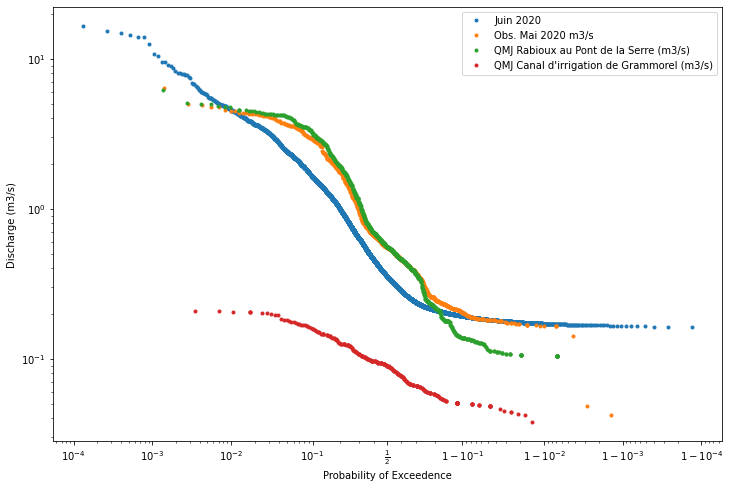

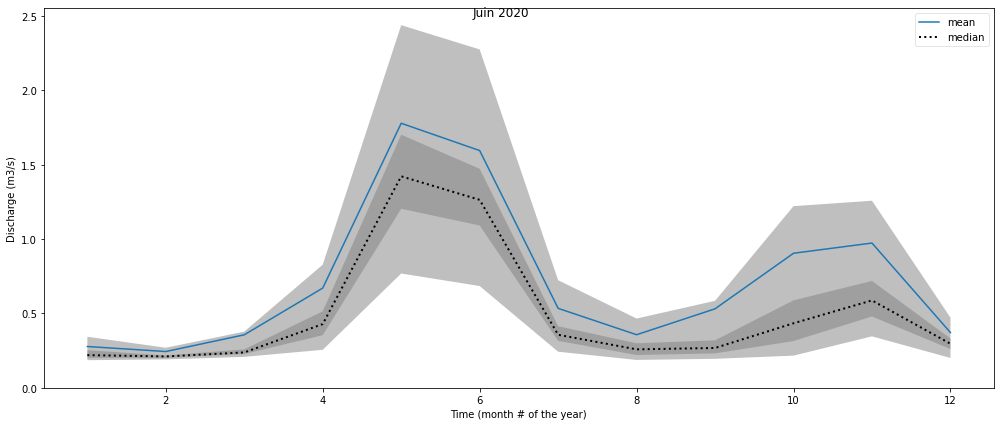

In [13]:
# ==========================================================
# ============== DAILY FREQUENCY ANALYSIS ==================
# ==========================================================
import hydrofunctions as hf
import os
%matplotlib inline 

# *************** Customization
# List of hydrograph Columns for flow duration curves
hydrographs = hydr
# Name of a single hydrograph column for analysis by month
one_hydrograph = 'Juin 2020'
# Axe Y title
y_label = 'Discharge (m3/s)'

# *************** Analysis and display 
summary = df[hydrographs].describe()
display(summary)

fig, axes = hf.flow_duration(df[hydrographs], ylabel=y_label, legend_loc='best')
fig.set_size_inches(12, 8)
flow_duration = file_prefix + '-flow duration curve.png'
flow_duration = os.path.join(output_file_path, flow_duration)
fig.savefig(flow_duration)

fig, axes = hf.cycleplot(df.loc[:, one_hydrograph], 'annual-month', title=one_hydrograph, y_label=y_label, legend_loc='best')
fig.show()
frequency_by_month = file_prefix + '-frequency analysis by month.png'
frequency_by_month = os.path.join(output_file_path, frequency_by_month)
fig.savefig(frequency_by_month)

# *************** Save outputs in excel file
output_file = file_prefix + '-frequency analysis.xlsx'
output_file = os.path.join(output_file_path, output_file)

with pd.ExcelWriter(output_file) as writer:
    summary.to_excel(writer, sheet_name= 'freq analysis')
    if os.path.exists(flow_duration):
        worksheet = writer.sheets['freq analysis']
        worksheet.insert_image('A11', flow_duration)
    if os.path.exists(frequency_by_month):
        worksheet.insert_image('A47', frequency_by_month)

In [20]:
df.hvplot.scatter(x='Juin 2020', y='Obs. Mai 2020 m3/s', width=900, height=500, legend='top_left')

:Scatter   [Juin 2020]   (Obs. Mai 2020 m3/s)